In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Albums

In [2]:
cols = ['id', 'conversation_id', 'date', 'time', 'user_id', 'username', 'tweet', 'replies_count', 'retweets_count', 'likes_count']

In [4]:
cols = ['id', 'conversation_id', 'date', 'user_id', 'username', 'tweet', 'replies_count', 'retweets_count', 'likes_count']
dark_wild = pd.read_csv('../data/raw/bts/dark_wild.csv', usecols=cols)
love = pd.read_csv('../data/raw/bts/love.csv', usecols=cols)
be = pd.read_csv('../data/raw/bts/be.csv', usecols=cols)
dark_wild['date'] = pd.to_datetime(dark_wild['date']).dt.date
love['date'] = pd.to_datetime(love['date']).dt.date
be['date'] = pd.to_datetime(be['date']).dt.date

In [5]:
print('Dark & Wild num tweets:', len(dark_wild))
print('Love Yourself: Tear:', len(love))
print('Be:', len(be))

Dark & Wild num tweets: 43344
Love Yourself: Tear: 263705
Be: 1357925


In [26]:
def plot_trend(df, title, release_date=None):
    fig, ax = plt.subplots()
    counts = df.date.value_counts()
    counts.plot(ax=ax, figsize=(15, 6))
    plt.ylabel('number of tweets')
    plt.xlabel('date')
    plt.xticks(rotation=45, ha="right")
    plt.title(title + ' Tweet Activity')
    if release_date:
        x = release_date
        ax.annotate('Album Release', xy = (x, np.mean([0, counts.mean()])), color='purple', alpha = 0.5)
        ax.axvline(x, color='purple', alpha=0.5)

In [42]:
# generating fake data
# album1 = be.sample(10000, random_state=0)[['date', 'username']]
# nums = pd.factorize(album1.username)[0].astype(str)
# vals = ['user'] * len(nums)
# album1['username'] = np.core.defchararray.add(vals, nums)
# album1.to_csv('../test/testdata/tweets/album3.csv', index=False)

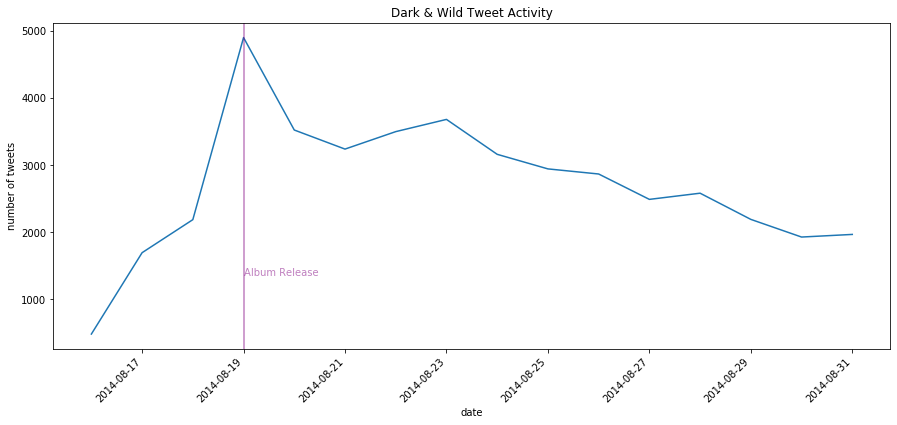

In [27]:
plot_trend(dark_wild, 'Dark & Wild', '2014-08-19')

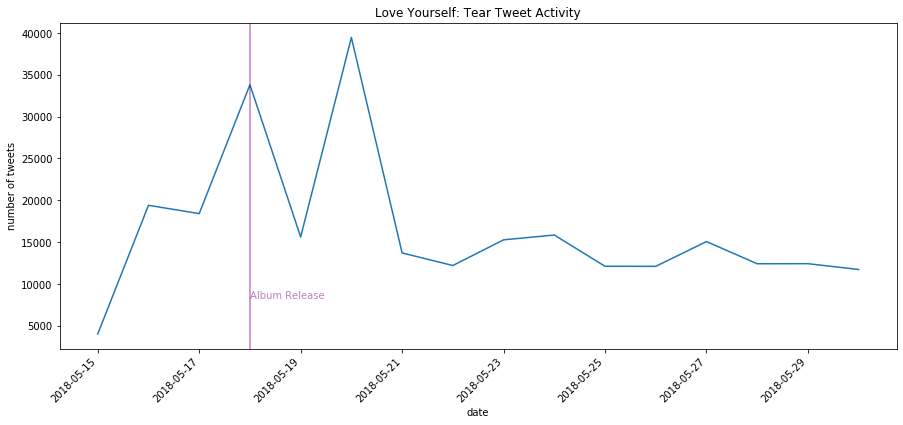

In [8]:
plot_trend(love, 'Love Yourself: Tear', '2018-05-18')

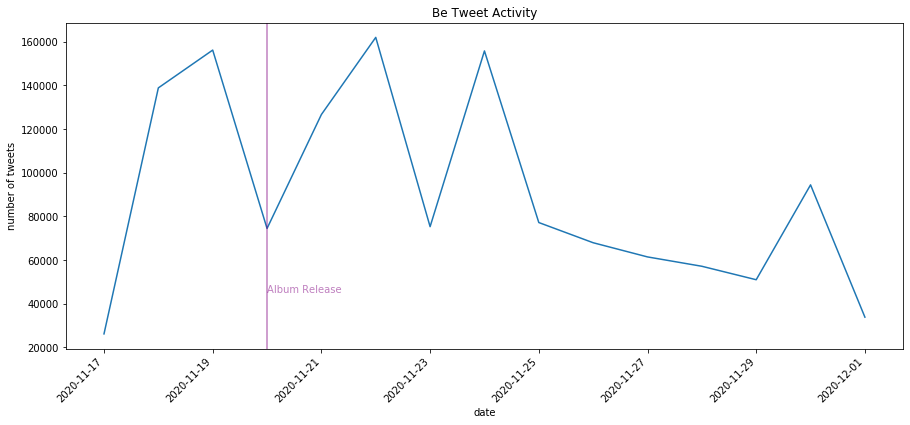

In [9]:
plot_trend(be, 'Be', '2020-11-20')

## WLM

In [30]:
wlm = pd.read_csv('../data/raw/wlm.csv', usecols=cols)
wlm['date'] = pd.to_datetime(wlm['date']).dt.date
wlm['hour'] = pd.to_datetime(wlm['time']).dt.hour

In [36]:
wlm['kpop'] = wlm.tweet.str.lower().str.strip().str.contains('kpop|k-pop|bts|stan|fancam|https://t.co')
wlm['kpop'].mean()

0.6128964941569283

In [25]:
kpop = wlm[wlm.kpop == True]
non = wlm[wlm.kpop == False]

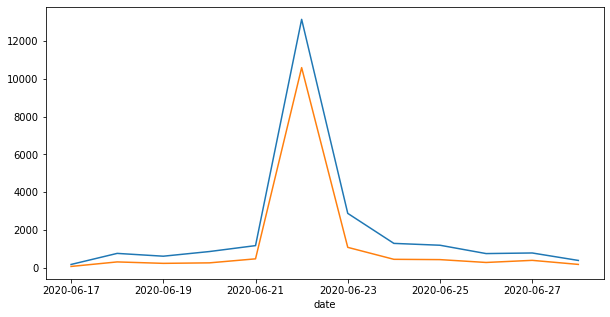

In [26]:
ax = wlm.groupby('date').size().plot(figsize=(10, 5))
kpop.groupby('date').size().plot(ax=ax)

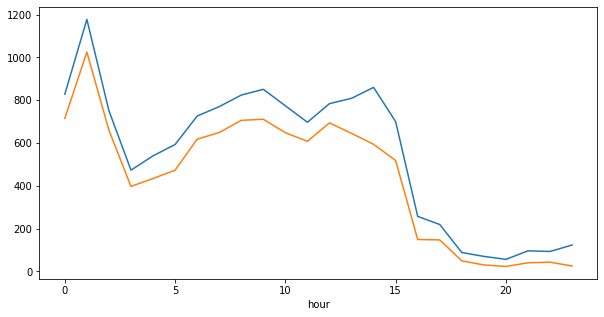

In [37]:
day = wlm[wlm.date.astype(str) == '2020-06-22']
day_kpop = day[day.kpop == True]
day_non = day[day.kpop == False]

day_ax = day.groupby('hour').size().plot(figsize=(10, 5))
day_kpop.groupby('hour').size().plot(ax=day_ax)